In [6]:
df = pd.read_parquet('dataset.parquet', engine='pyarrow')

print(df)

           inst      bi   time  label
0        274560   29756    427      1
1        273975   29862    389      1
2        273510   29309    389      1
3        274614   29368    417      1
4        273029   29531    428      1
...         ...     ...    ...    ...
199995   827159  314966    336      0
199996     1916    1831  10270      0
199997   132652     125   1797      0
199998  4743522     575   4179      0
199999   277053     362    679      0

[200000 rows x 4 columns]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
import joblib

# Load the dataset
df = pd.read_parquet('dataset.parquet', engine='pyarrow')

# Split the dataset into features and labels
X = df[['inst', 'bi', 'time']]
y = df['label']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define a function to create the model
def create_model(activation1,activation2,activation3,activation4,activation5, optimizer, dropout):
    model = Sequential()
    model.add(Input(shape=(3,)))
    model.add(Dense(units=256, activation=activation1, kernel_initializer='glorot_uniform'))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=128, activation=activation2))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=64, activation=activation3))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=32, activation=activation4))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=16, activation=activation5))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid = {
    'batch_size': [1024],
    'epochs': [100],
    'model__activation1': ['relu', 'tanh'],
    'model__activation2': ['relu', 'tanh'],
    'model__activation3': ['relu', 'tanh'],
    'model__activation4': ['relu', 'tanh'],
    'model__activation5': ['relu', 'tanh'],
    'model__optimizer': ['rmsprop'],
    'model__dropout': [0.5]
}

# Wrap the Keras model with the KerasClassifier
model = KerasClassifier(
    model=create_model,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# Perform grid search
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, return_train_score=True, verbose=0)
gs_result = gs.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid))

# Print the best parameters and the best score
print(f"Best Parameters: {gs_result.best_params_}")
print(f"Best Score: {gs_result.best_score_}")

best_model = gs_result.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

best_model.model_.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


KeyboardInterrupt: 

Training combination 1 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 2 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 3 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 4 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 5 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 6 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 7 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 8 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 9 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 10 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 11 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 12 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 13 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 14 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 15 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 16 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'relu', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 17 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 18 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 19 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 20 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 21 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 22 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 23 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 24 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 25 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 26 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 27 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 28 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'relu', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 29 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 30 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 31 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Training combination 32 of 32 with params: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'tanh', 'model__activation3': 'tanh', 'model__activation4': 'tanh', 'model__activation5': 'tanh', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Best Parameters: {'batch_size': 1024, 'epochs': 100, 'model__activation1': 'tanh', 'model__activation2': 'relu', 'model__activation3': 'tanh', 'model__activation4': 'relu', 'model__activation5': 'relu', 'model__optimizer': 'rmsprop', 'model__dropout': 0.5}
Best Score: 0.9498293333333333
Test Accuracy: 0.7476


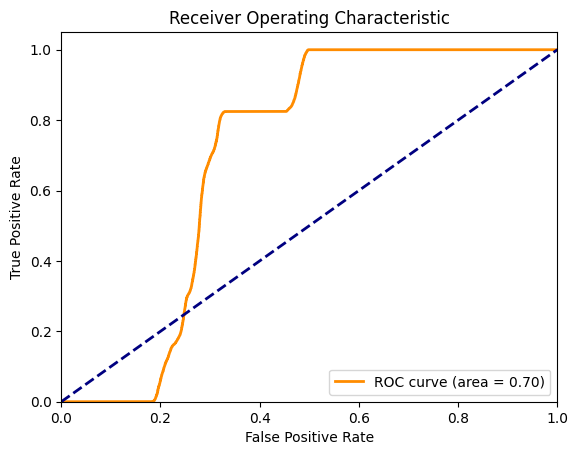

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping
import joblib
import itertools
from math import prod

# Load the dataset
df = pd.read_parquet('dataset.parquet', engine='pyarrow')

# Split the dataset into features and labels
X = df[['inst', 'bi', 'time']]
y = df['label']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define a function to create the model
def create_model(activation1, activation2, activation3, activation4, activation5, optimizer, dropout):
    model = Sequential()
    model.add(Input(shape=(3,)))
    model.add(Dense(units=256, activation=activation1, kernel_initializer='glorot_uniform'))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=128, activation=activation2))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=64, activation=activation3))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=32, activation=activation4))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=16, activation=activation5))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid = {
    'batch_size': [1024],
    'epochs': [100],
    'model__activation1': ['tanh'],
    'model__activation2': ['relu'],
    'model__activation3': ['tanh'],
    'model__activation4': ['relu'],
    'model__activation5': ['relu'],
    'model__optimizer': ['rmsprop'],
    'model__dropout': [0.5]
}

# Calculate the total number of combinations
total_combinations = prod(len(v) for v in param_grid.values())

# Wrap the Keras model with the KerasClassifier
model = KerasClassifier(
    model=create_model,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# Custom callback to print progress
class PrintProgress(tf.keras.callbacks.Callback):
    def __init__(self, total_combinations):
        self.total_combinations = total_combinations
        self.current_combination = 0

    def on_train_begin(self, logs=None):
        self.current_combination += 1
        print(f"Training combination {self.current_combination} of {self.total_combinations}")


def fit_with_progress(estimator, param_grid, *args, **kwargs):
    combinations = list(itertools.product(*(param_grid[params] for params in param_grid)))
    total_combinations = len(combinations)
    current_combination = 0

    best_score = None
    best_params = None

    for combination in combinations:
        current_combination += 1
        params = {param: value for param, value in zip(param_grid.keys(), combination)}
        print(f"Training combination {current_combination} of {total_combinations} with params: {params}")

        estimator.set_params(**params)
        estimator.fit(*args, **kwargs)

        score = estimator.score(kwargs['X'], kwargs['y'])
        if best_score is None or score > best_score:
            best_score = score
            best_params = params

    return best_score, best_params

# Grid search with custom callback
gs_result = fit_with_progress(model, param_grid, X=X_train_scaled, y=y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {gs_result[1]}")
print(f"Best Score: {gs_result[0]}")

best_model = model.set_params(**gs_result[1])
accuracy = best_model.score(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

best_model.model_.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

df = pd.read_parquet('dataset.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(32, input_shape=(3,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid))

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')





Epoch 1/50


5860/5860 [==============================] - 17s 3ms/step - loss: 0.3142 - accuracy: 0.8571 - val_loss: 0.1936 - val_accuracy: 0.9232
Epoch 2/50
5860/5860 [==============================] - 15s 3ms/step - loss: 0.1746 - accuracy: 0.9356 - val_loss: 0.1683 - val_accuracy: 0.9336
Epoch 3/50
5860/5860 [==============================] - 15s 3ms/step - loss: 0.1577 - accuracy: 0.9415 - val_loss: 0.1512 - val_accuracy: 0.9484
Epoch 4/50
5860/5860 [==============================] - 15s 3ms/step - loss: 0.1537 - accuracy: 0.9427 - val_loss: 0.1559 - val_accuracy: 0.9424
Epoch 5/50
5860/5860 [==============================] - 15s 3ms/step - loss: 0.1515 - accuracy: 0.9428 - val_loss: 0.1417 - val_accuracy: 0.9426
Epoch 6/50
5860/5860 [==============================] - 15s 3ms/step - loss: 0.1492 - accuracy: 0.9441 - val_loss: 0.1560 - val_accuracy: 0.9436
Epoch 7/50
5860/5860 [==============================] - 15s 3ms/step - loss: 0.1490 - accuracy: 0.9438 - val_loss: 0.1387 - v

Epoch 49/50
5860/5860 [==============================] - 22s 4ms/step - loss: 0.1280 - accuracy: 0.9528 - val_loss: 0.1174 - val_accuracy: 0.9572
Epoch 50/50
1954/1954 [==============================] - 5s 2ms/step - loss: 0.1278 - accuracy: 0.9543
Test Accuracy: 0.9543


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import joblib

df = pd.read_parquet('teste20.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Accuracy: {accuracy:.4f}')

model.save('nn_model.keras')

joblib.dump(scaler, 'scaler.joblib')


Epoch 1/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7155 - loss: 0.5548 - val_accuracy: 0.8711 - val_loss: 0.3082
Epoch 2/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8724 - loss: 0.3215 - val_accuracy: 0.8832 - val_loss: 0.2721
Epoch 3/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8854 - loss: 0.2949 - val_accuracy: 0.9071 - val_loss: 0.2234
Epoch 4/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8910 - loss: 0.2828 - val_accuracy: 0.9074 - val_loss: 0.2234
Epoch 5/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8956 - loss: 0.2732 - val_accuracy: 0.9079 - val_loss: 0.2188
Epoch 6/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8977 - loss: 0.2677 - val_accuracy: 0.9195 - val_loss: 0.1982
Epoch 7/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8999 - loss: 0.2642 - val_accuracy: 0.9167 - val_loss: 0.2038
Epoch 8/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9013 - loss: 0

['scaler.joblib']

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib

def nnclassifier(parquet_path):
    model = load_model('nn_model.keras')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    scaler = joblib.load('scaler.joblib')
    
    dataset = pd.read_parquet(parquet_path)
    
    X_new = dataset[['inst', 'bi', 'time']]
    
    new_data_scaled = scaler.transform(X_new)
    
    predictions = model.predict(new_data_scaled)
    
    prediction_classes = (predictions > 0.5).astype("int32")
    
    return prediction_classes

parquet_path = 'teste.parquet'
predicted_classes = nnclassifier(parquet_path)

print(predicted_classes)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib
import numpy as np
import pandas as pd

df = pd.read_parquet('teste.parquet', engine='pyarrow')

lab = df['label']

print (lab)

def nnclassifier(parquet_path):
    model = load_model('nn_model.keras')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    scaler = joblib.load('scaler.joblib')
    
    dataset = pd.read_parquet(parquet_path)
    
    X_new = dataset[['inst', 'bi', 'time']]
    
    new_data_scaled = scaler.transform(X_new)
    
    predictions = model.predict(new_data_scaled)
    
    prediction_classes = (predictions > 0.5).astype("int32")
    
    return prediction_classes

parquet_path = 'teste.parquet'
predicted_classes = nnclassifier(parquet_path)

print(predicted_classes)

true_values = lab.values

predictions_flat = predicted_classes.flatten()

comparison = predictions_flat == true_values

acc = 0
for i in (comparison):
    if i:
        acc = acc+1
    
accuracy = (acc / len(true_values))

print (accuracy)

print(comparison)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


KeyboardInterrupt: 

In [43]:
import numpy as np
import pandas as pd

true_values = lab.values

predictions_flat = predicted_classes.flatten()

comparison = predictions_flat == true_values

acc = 0
for i in (comparison):
    if i:
        acc = acc+1
    
accuracy = (acc / len(true_values))

print (accuracy)

print(comparison)

0.76218
[ True  True  True ... False  True  True]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.optimizers import RMSprop
##from keras.optimizers import Adam
import joblib

df = pd.read_parquet('dataset.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
model.add(Input(shape=(3,)))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Accuracy: {accuracy:.4f}')

model.save('nn_model.keras')

joblib.dump(scaler, 'scaler.joblib')




Epoch 1/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8136 - loss: 0.4134 - val_accuracy: 0.9010 - val_loss: 0.2657
Epoch 2/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8978 - loss: 0.2802 - val_accuracy: 0.9147 - val_loss: 0.2638
Epoch 3/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8947 - loss: 0.2817 - val_accuracy: 0.9229 - val_loss: 0.2065
Epoch 4/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9042 - loss: 0.2645 - val_accuracy: 0.9191 - val_loss: 0.2206
Epoch 5/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9030 - loss: 0.2671 - val_accuracy: 0.9114 - val_loss: 0.2363
Epoch 6/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9053 - loss: 0.2615 - val_accuracy: 0.9096 - val_loss: 0.2366
Epoch 7/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9065 - loss: 0.2566 - val_accuracy: 0.9267 - val_loss: 0.2343
Epoch 8/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9090 - loss: 0

['scaler.joblib']

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
import joblib

df = pd.read_parquet('dataset.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Input(shape=(3,)))

model.add(Dense(256, activation='tanh'))

model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='tanh'))

model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
##reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1024, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Accuracy: {accuracy:.4f}')

model.save('nn_model.keras')

joblib.dump(scaler, 'scaler.joblib')


Epoch 1/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6059 - loss: 0.7756 - val_accuracy: 0.5011 - val_loss: 1.7715
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7496 - loss: 0.4988 - val_accuracy: 0.5011 - val_loss: 2.2177
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8842 - loss: 0.3061 - val_accuracy: 0.5011 - val_loss: 2.8927
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9070 - loss: 0.2595 - val_accuracy: 0.5011 - val_loss: 3.1281
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9146 - loss: 0.2432 - val_accuracy: 0.4157 - val_loss: 3.0925
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9193 - loss: 0.2289 - val_accuracy: 0.4384 - val_loss: 2.4954
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9191 - loss: 0.2280 - val_accuracy: 0.6995 - val_loss: 0.6542
Epoch 8/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9220 - loss: 0.2205 - 

['scaler.joblib']

Epoch 1/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5584 - loss: 18.7743 - val_accuracy: 0.4989 - val_loss: 1.6612
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8230 - loss: 0.9935 - val_accuracy: 0.5011 - val_loss: 0.8618
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9296 - loss: 0.3283 - val_accuracy: 0.5011 - val_loss: 1.1269
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9447 - loss: 0.2566 - val_accuracy: 0.6259 - val_loss: 0.6406
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9485 - loss: 0.2391 - val_accuracy: 0.9571 - val_loss: 0.1659
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9520 - loss: 0.2248 - val_accuracy: 0.9698 - val_loss: 0.1626
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9535 - loss: 0.2223 - val_accuracy: 0.9747 - val_loss: 0.1361
Epoch 8/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9553 - loss: 0.2130 -

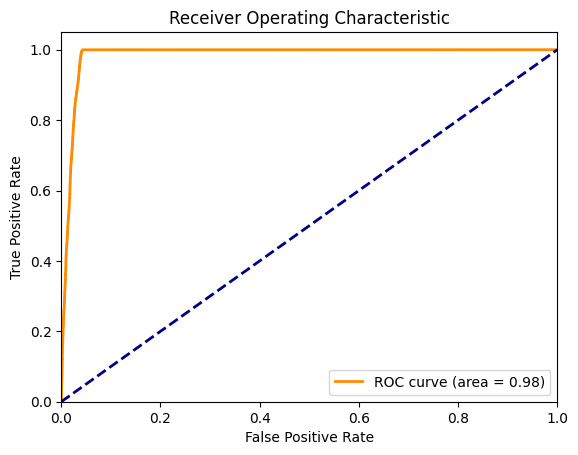

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.activations import gelu, swish, softplus
import joblib

df = pd.read_parquet('dataset.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

##scaler = StandardScaler()
##scaler = Normalizer()
scaler = PowerTransformer(method='yeo-johnson')
#scaler = RobustScaler()
##scaler = MaxAbsScaler()
##scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define regularization parameters
l1_reg = 1e-4
l2_kernel_reg = 1e-1
l2_bias_reg = 1e-4
activity_reg = 1e-5

dpout = 0.7

##activation='leaky_relu'
##activation='elu'
##activation=None ... model.add(PReLU()) 
##activation=None ... model.add(LeakyReLU(alpha=0.01))
##activation='tanh'
##activation='elu'
##activation = gelu
##activation = softplus
##activation = swish

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg),
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, 
                activation='relu', 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, 
                activation='relu', 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, 
                activation='relu', 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, 
                activation='relu', 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))


optimizer = RMSprop(learning_rate=0.001)
##optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
##reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1024, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste1.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste2.parquet', engine='pyarrow')

# Extract features and labels
X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

# Scale the additional datasets using the same scaler
X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

# Evaluate the model on the additional datasets
loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (teste.parquet): {accuracy_extra:.4f}')
print(f'Test Accuracy (teste1.parquet): {accuracy1_extra:.4f}')
print(f'Test Accuracy (teste2.parquet): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

y_pred_prob = model.predict(X_test_scaled).ravel()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


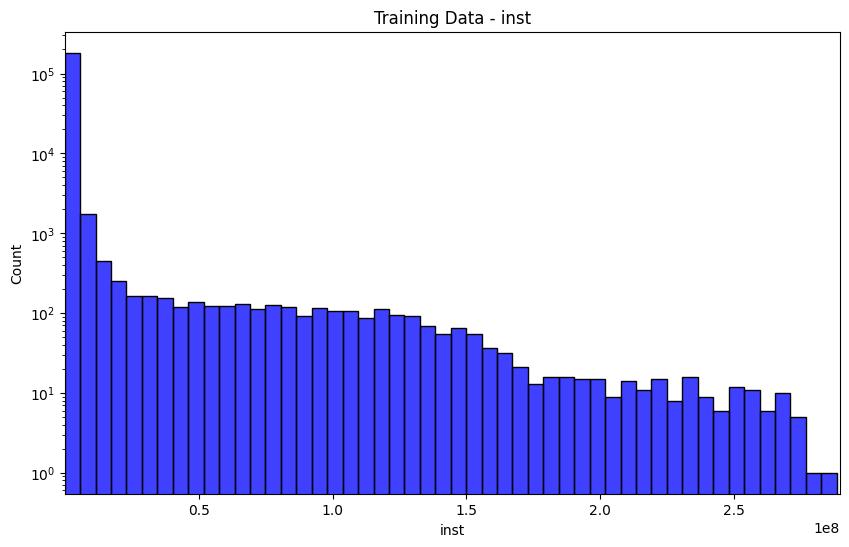

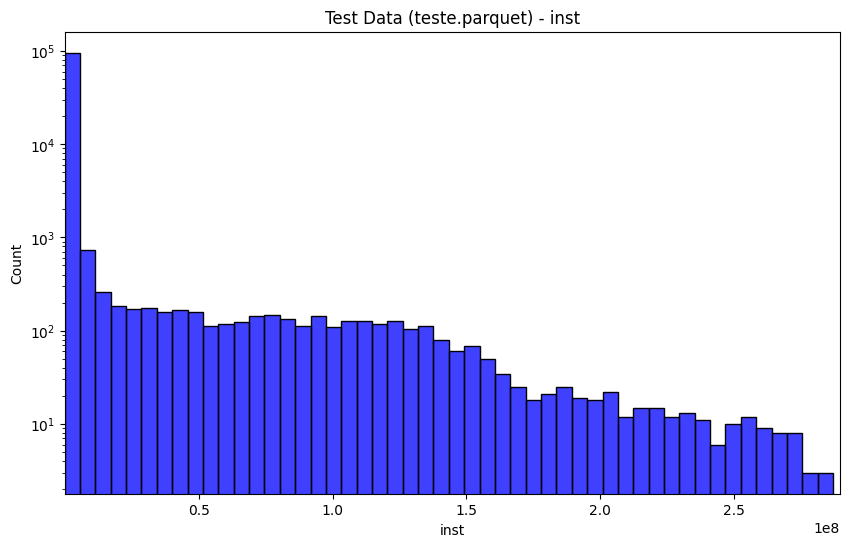

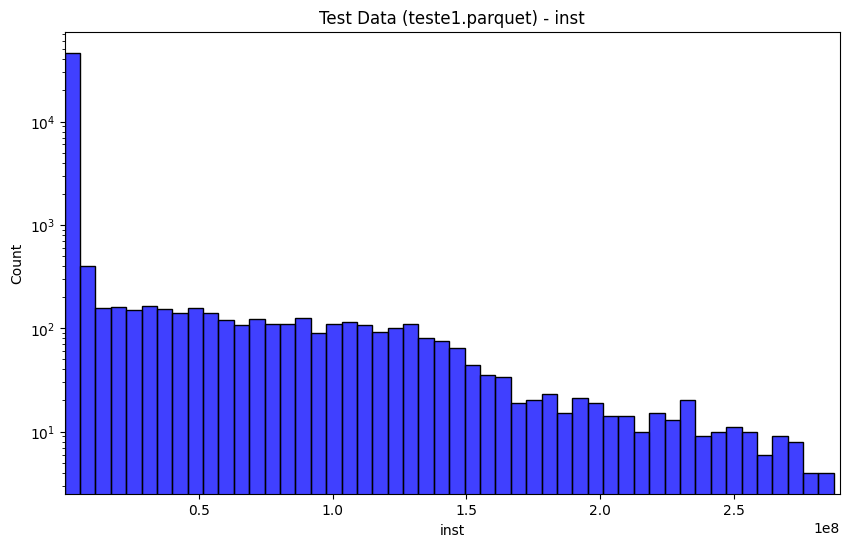

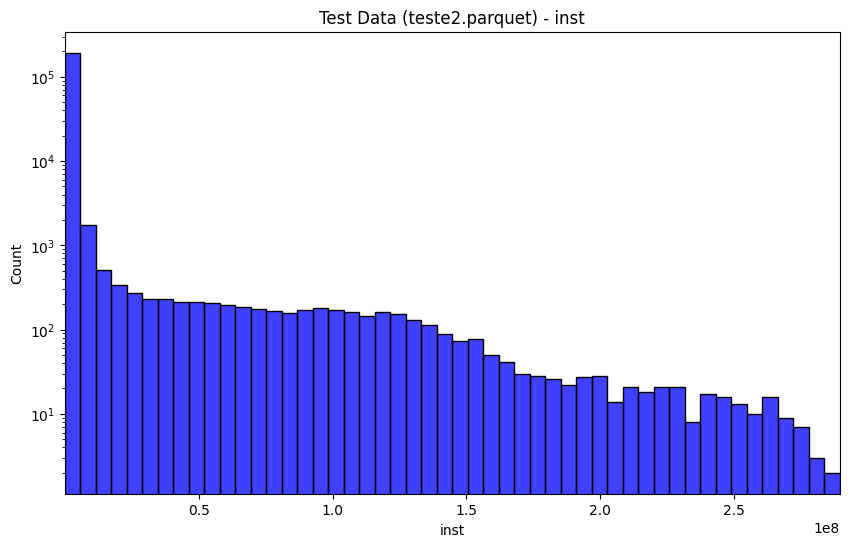

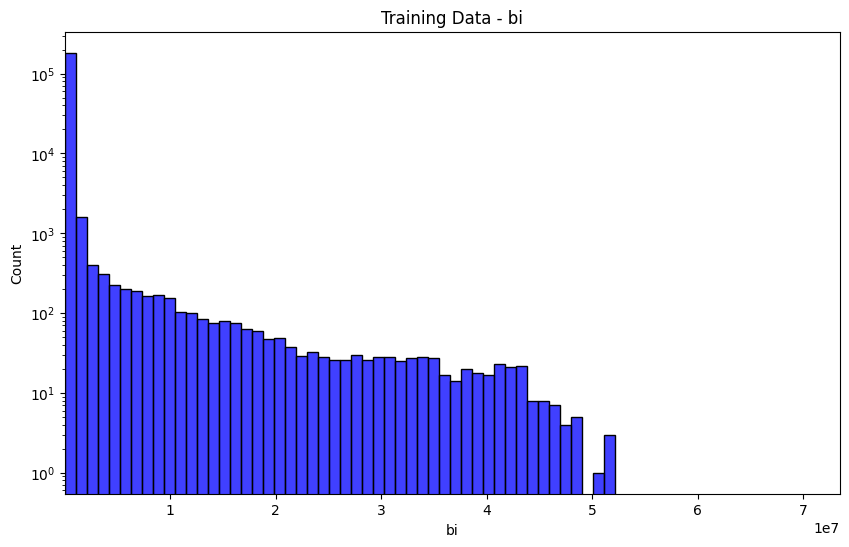

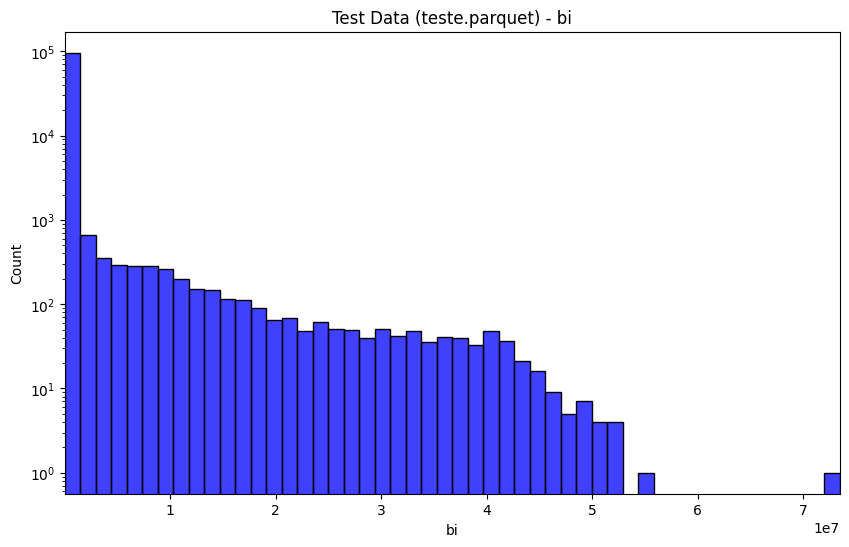

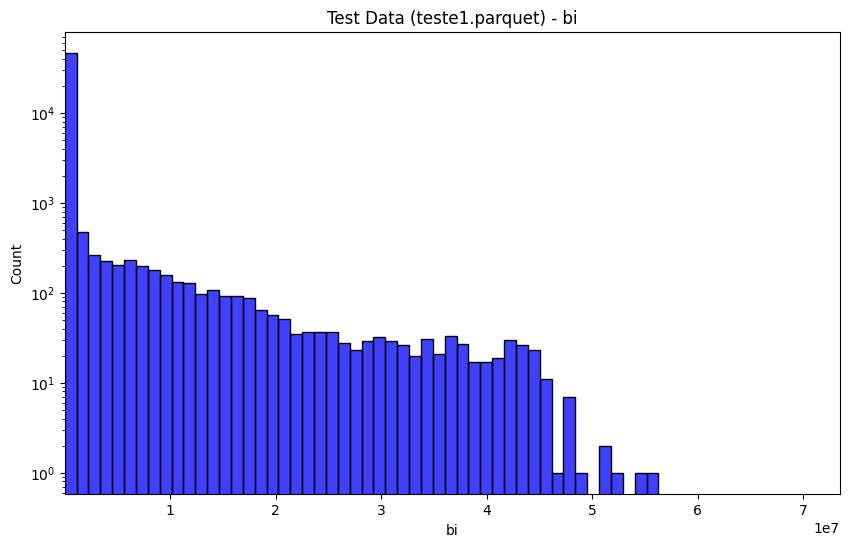

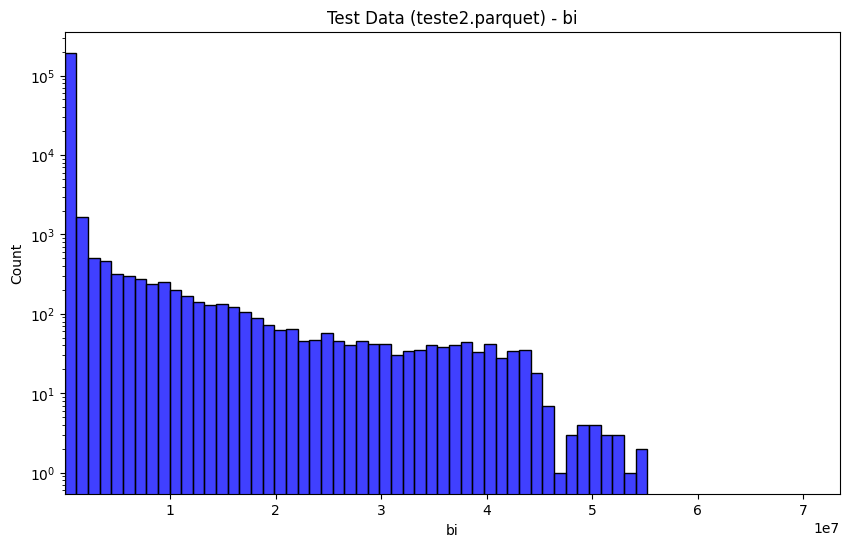

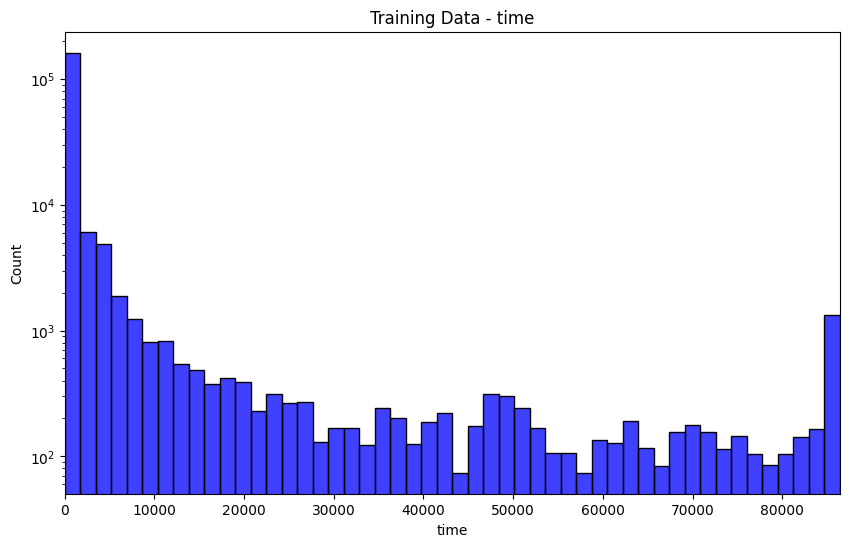

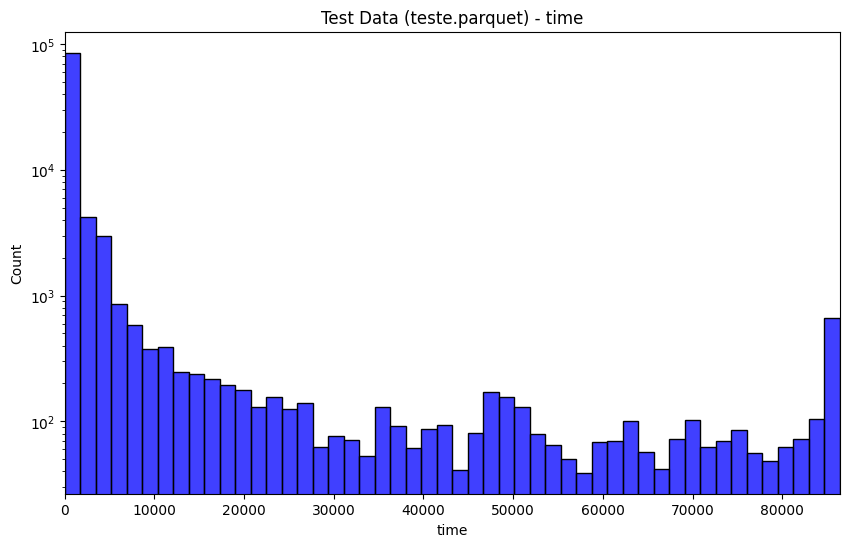

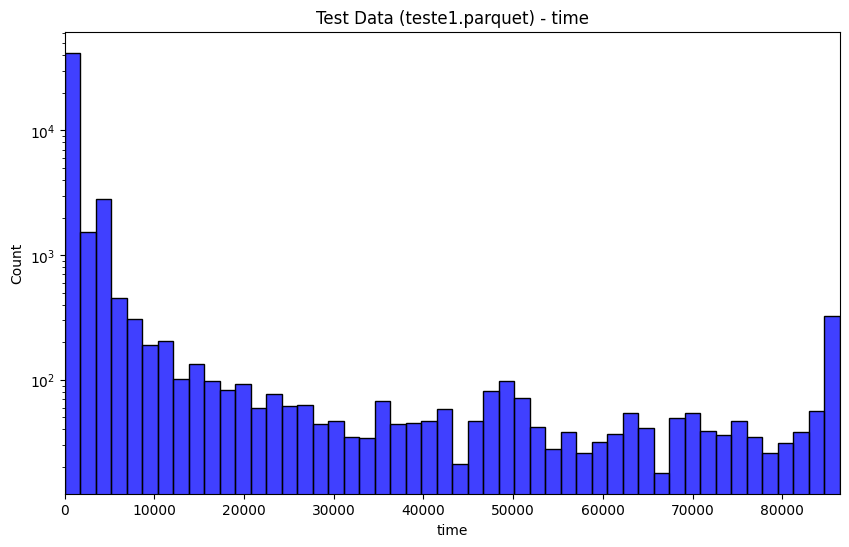

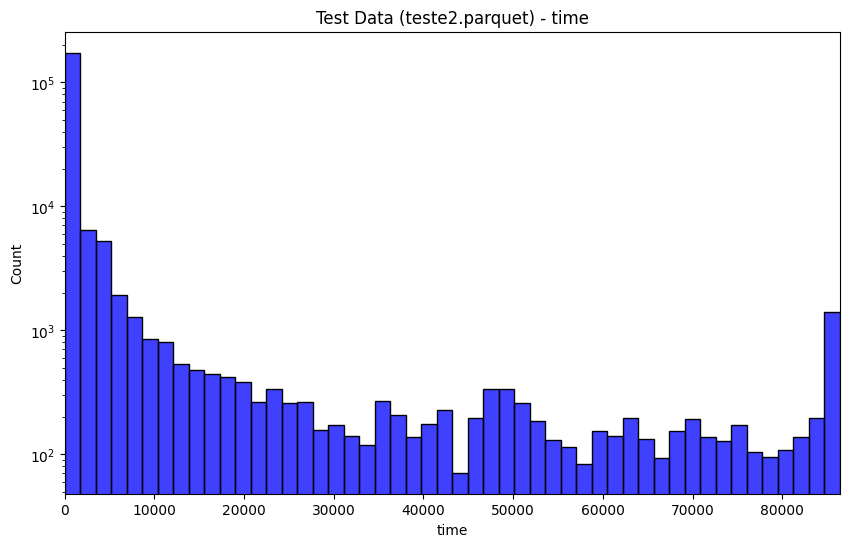

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the min and max values for a feature across multiple datasets
def calculate_feature_limits(feature, datasets):
    feature_min = float('inf')
    feature_max = float('-inf')
    for data in datasets:
        feature_min = min(feature_min, data[feature].min())
        feature_max = max(feature_max, data[feature].max())
    return feature_min, feature_max

# Function to plot feature distribution with consistent x-axis limits
def plot_feature_distribution(data, feature, title, x_limits):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=50, color='blue')
    plt.xlim(x_limits)
    plt.yscale("log")
    plt.title(title)
    plt.show()
    plt.close()

# List of datasets
datasets = [X_train, df_test, df_test1, df_test2]

# Iterate over each feature and plot distributions with consistent x-axis limits
for feature in ['inst', 'bi', 'time']:
    x_limits = calculate_feature_limits(feature, datasets)
    plot_feature_distribution(X_train, feature, f'Training Data - {feature}', x_limits)
    plot_feature_distribution(df_test, feature, f'Test Data (teste.parquet) - {feature}', x_limits)
    plot_feature_distribution(df_test1, feature, f'Test Data (teste1.parquet) - {feature}', x_limits)
    plot_feature_distribution(df_test2, feature, f'Test Data (teste2.parquet) - {feature}', x_limits)



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from keras.optimizers import RMSprop
import joblib

# Load the dataset
df = pd.read_parquet('dataset.parquet', engine='pyarrow')

# Split the dataset into features and labels
X = df[['inst', 'bi', 'time']]
y = df['label']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Regularization parameter
l2_reg = 0.01  # Reduced from 0.05 to 0.01

# Build the model
model = Sequential([
    Input(shape=(3,)),
    Dense(256, activation='tanh', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='tanh', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='tanh', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train_scaled, y_train, 
    epochs=100, batch_size=1024, 
    validation_data=(X_valid_scaled, y_valid), 
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model and the scaler
model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')


Epoch 1/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5832 - loss: 3.0521 - val_accuracy: 0.5011 - val_loss: 1.4899 - learning_rate: 0.0010
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7142 - loss: 0.8129 - val_accuracy: 0.5011 - val_loss: 0.9849 - learning_rate: 0.0010
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8396 - loss: 0.4786 - val_accuracy: 0.5011 - val_loss: 1.5489 - learning_rate: 0.0010
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8744 - loss: 0.4022 - val_accuracy: 0.5011 - val_loss: 1.9977 - learning_rate: 0.0010
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8868 - loss: 0.3690 - val_accuracy: 0.5011 - val_loss: 2.6787 - learning_rate: 0.0010
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8946 - loss: 0.3464 - val_accuracy: 0.5011 - val_loss: 3.4302 - learning_rate: 0.0010
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8986 - l

Epoch 44/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9192 - loss: 0.2524 - val_accuracy: 0.9261 - val_loss: 0.2215 - learning_rate: 1.0000e-04
Epoch 45/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9177 - loss: 0.2579 - val_accuracy: 0.9221 - val_loss: 0.2365 - learning_rate: 1.0000e-04
Epoch 46/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9197 - loss: 0.2518 - val_accuracy: 0.8622 - val_loss: 0.2917 - learning_rate: 1.0000e-04
Epoch 47/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9196 - loss: 0.2520 - val_accuracy: 0.9144 - val_loss: 0.2691 - learning_rate: 1.0000e-04
Epoch 48/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9185 - loss: 0.2531 - val_accuracy: 0.9292 - val_loss: 0.2104 - learning_rate: 1.0000e-04
Epoch 49/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9194 - loss: 0.2525 - val_accuracy: 0.9265 - val_loss: 0.2226 - learning_rate: 1.0000e-04
Epoch 50/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 1

['scaler.joblib']

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7770 - loss: 2.6672 - val_accuracy: 0.9016 - val_loss: 0.5324 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8843 - loss: 0.5166 - val_accuracy: 0.9254 - val_loss: 0.5487 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8906 - loss: 0.4797 - val_accuracy: 0.9134 - val_loss: 0.4656 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8950 - loss: 0.4574 - val_accuracy: 0.9148 - val_loss: 0.4511 - learning_rate: 0.0010
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8943 - loss: 0.4437 - val_accuracy: 0.9316 - val_loss: 0.4369 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8985 - loss: 0.4264 - val_accuracy: 0.9050 - val_loss: 0.5776 - learning_rate: 0.0010
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accura

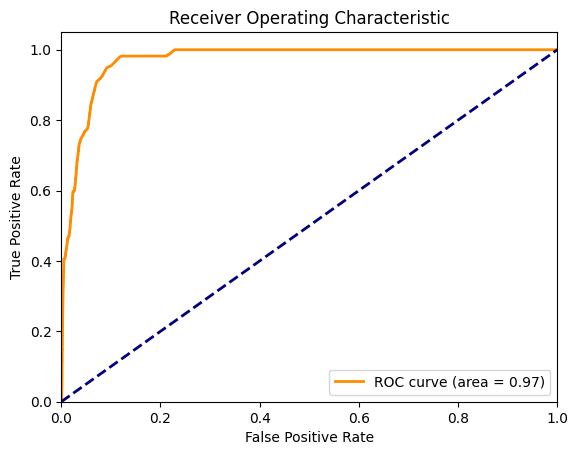

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.activations import gelu, swish, softplus
import joblib

df = pd.read_parquet('teste20.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

##scaler = StandardScaler()
##scaler = Normalizer()
scaler = PowerTransformer(method='yeo-johnson')
#scaler = RobustScaler()
##scaler = MaxAbsScaler()
##scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define regularization parameters
l1_reg = 1e-4
l2_kernel_reg = 1e-2
l2_bias_reg = 5e-4
activity_reg = 1e-4

dpout = 0.5

##activation='leaky_relu'
##activation='elu'
##activation=None ... model.add(PReLU()) 
##activation=None ... model.add(LeakyReLU(alpha=0.01))
##activation='tanh'
##activation='elu'
##activation = gelu
##activation = softplus
##activation = swish

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, 
                activation=gelu,
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg),
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, 
                activation=swish, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, 
                activation=softplus, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, 
                activation= swish, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, 
                activation=softplus, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))


##optimizer = RMSprop(learning_rate=0.001)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=100, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste30.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste00.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste10.parquet', engine='pyarrow')

# Extract features and labels
X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

# Scale the additional datasets using the same scaler
X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

# Evaluate the model on the additional datasets
loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (50000): {accuracy_extra:.4f}')
print(f'Test Accuracy (100000): {accuracy1_extra:.4f}')
print(f'Test Accuracy (200000): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

y_pred_prob = model.predict(X_test_scaled).ravel()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6477 - loss: 6.6081 - val_accuracy: 0.5001 - val_loss: 1.7083 - learning_rate: 0.0010
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8917 - loss: 1.3758 - val_accuracy: 0.5000 - val_loss: 0.9894 - learning_rate: 0.0010
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9330 - loss: 0.4650 - val_accuracy: 0.5000 - val_loss: 1.0034 - learning_rate: 0.0010
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9439 - loss: 0.2733 - val_accuracy: 0.5000 - val_loss: 0.5539 - learning_rate: 0.0010
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9452 - loss: 0.2337 - val_accuracy: 0.9642 - val_loss: 0.1927 - learning_rate: 0.0010
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9465 - loss: 0.2212 - val_accuracy: 0.9533 - val_loss: 0.1764 - learning_rate: 0.0010
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9464 - l

Epoch 44/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9664 - loss: 0.1271 - val_accuracy: 0.9722 - val_loss: 0.1018 - learning_rate: 1.0000e-04
Epoch 45/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9664 - loss: 0.1265 - val_accuracy: 0.9743 - val_loss: 0.0970 - learning_rate: 1.0000e-04
Epoch 46/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9659 - loss: 0.1285 - val_accuracy: 0.9730 - val_loss: 0.1024 - learning_rate: 1.0000e-04
Epoch 47/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9674 - loss: 0.1241 - val_accuracy: 0.9752 - val_loss: 0.0949 - learning_rate: 1.0000e-04
Epoch 48/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9681 - loss: 0.1235 - val_accuracy: 0.9727 - val_loss: 0.1043 - learning_rate: 1.0000e-04
Epoch 49/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9670 - loss: 0.1251 - val_accuracy: 0.9718 - val_loss: 0.1095 - learning_rate: 1.0000e-04
Epoch 50/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 2

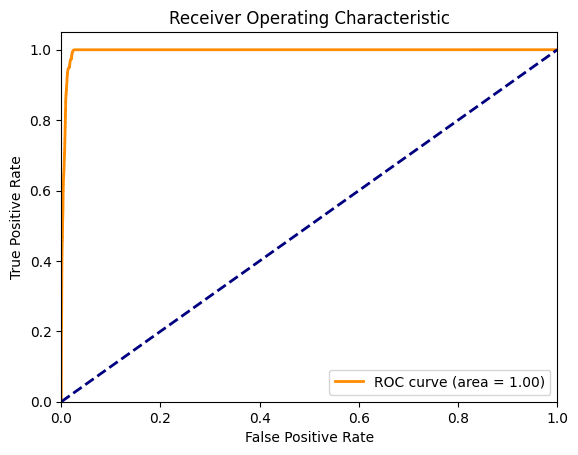

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import gelu, swish, softplus
import joblib

df = pd.read_parquet('teste20.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define regularization parameters
l1_reg = 1e-4
l2_kernel_reg = 1e-2
l2_bias_reg = 1e-4
activity_reg = 1e-5

dpout = 0.5  # Increased dropout

# Trying a different activation function: swish
activation = swish

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, 
                activation=None,
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg),
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(LeakyReLU(alpha=0.09))  # Adding LeakyReLU activation
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, 
                activation=None, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, 
                activation=None, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, 
                activation=None, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, 
                activation=None, 
                kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                bias_regularizer=regularizers.L2(l2_bias_reg), 
                activity_regularizer=regularizers.L2(activity_reg)
               ))
model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)  # Changed optimizer to Adam

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1024, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste30.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste00.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste10.parquet', engine='pyarrow')

X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (50000): {accuracy_extra:.4f}')
print(f'Test Accuracy (100000): {accuracy1_extra:.4f}')
print(f'Test Accuracy (200000): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

y_pred_prob = model.predict(X_test_scaled).ravel()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [17]:
import pandas as pd

# Load the parquet file
df = pd.read_parquet('teste00.parquet', engine='pyarrow')

# Print the length of the dataframe
length_of_df = len(df)
print(length_of_df)

100000


In [18]:
import pandas as pd

# Load the parquet file
df = pd.read_parquet('teste10.parquet', engine='pyarrow')

# Print the length of the dataframe
length_of_df = len(df)
print(length_of_df)

200000


In [19]:
import pandas as pd

# Load the parquet file
df = pd.read_parquet('teste30.parquet', engine='pyarrow')

# Print the length of the dataframe
length_of_df = len(df)
print(length_of_df)

50000


Epoch 1/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6968 - loss: 0.6085 - val_accuracy: 0.8989 - val_loss: 0.2643 - learning_rate: 0.0010
Epoch 2/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9021 - loss: 0.2948 - val_accuracy: 0.8913 - val_loss: 0.2988 - learning_rate: 0.0010
Epoch 3/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9096 - loss: 0.2762 - val_accuracy: 0.9256 - val_loss: 0.2026 - learning_rate: 0.0010
Epoch 4/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9149 - loss: 0.2583 - val_accuracy: 0.9404 - val_loss: 0.1760 - learning_rate: 0.0010
Epoch 5/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9166 - loss: 0.2508 - val_accuracy: 0.9299 - val_loss: 0.1815 - learning_rate: 0.0010
Epoch 6/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9207 - loss: 0.2413 - val_accuracy: 0.9358 - val_loss: 0.1777 - learning_rate: 0.0010
Epoch 7/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accura

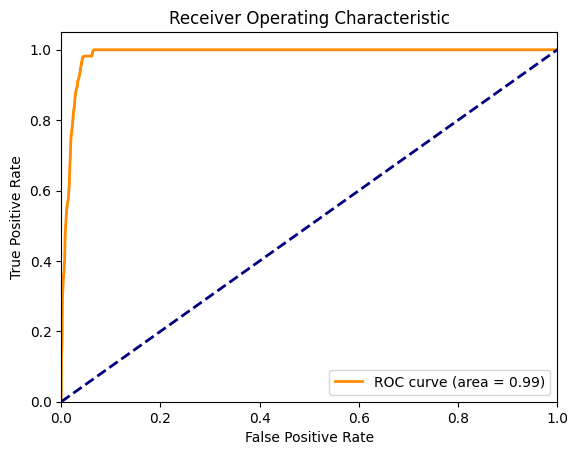

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.activations import gelu, swish, softplus
import joblib

df = pd.read_parquet('teste20.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define regularization parameters
l1_reg = 1e-4
l2_kernel_reg = 1e-2
l2_bias_reg = 1e-4
activity_reg = 1e-5

dpout = 0.7  # Increased dropout



model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, 
                activation='relu',
                #kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                #bias_regularizer=regularizers.L2(l2_bias_reg),
                #activity_regularizer=regularizers.L2(activity_reg)
               ))
#model.add(LeakyReLU(alpha=0.09))  # Adding LeakyReLU activation
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, 
                activation='relu', 
                #kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                #bias_regularizer=regularizers.L2(l2_bias_reg), 
                #activity_regularizer=regularizers.L2(activity_reg)
               ))
#model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, 
                activation='relu', 
                #kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                #bias_regularizer=regularizers.L2(l2_bias_reg), 
                #activity_regularizer=regularizers.L2(activity_reg)
               ))
#model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, 
                activation='relu', 
                #kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                #bias_regularizer=regularizers.L2(l2_bias_reg), 
                #activity_regularizer=regularizers.L2(activity_reg)
               ))
#model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, 
                activation='relu', 
                #kernel_regularizer=regularizers.L1L2(l1=l1_reg, l2=l2_kernel_reg), 
                #bias_regularizer=regularizers.L2(l2_bias_reg), 
                #activity_regularizer=regularizers.L2(activity_reg)
               ))
#model.add(LeakyReLU(alpha=0.09))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001)  # Changed optimizer to Adam

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste30.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste00.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste10.parquet', engine='pyarrow')

X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (50000): {accuracy_extra:.4f}')
print(f'Test Accuracy (100000): {accuracy1_extra:.4f}')
print(f'Test Accuracy (200000): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

y_pred_prob = model.predict(X_test_scaled).ravel()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib
import numpy as np
import pandas as pd

df = pd.read_parquet('teste00.parquet', engine='pyarrow')

lab = df['label']

print(lab)

def nnclassifier(parquet_path):
    model = load_model('nn_model.keras')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    scaler = joblib.load('scaler.joblib')
    
    dataset = pd.read_parquet(parquet_path)
    
    X_new = dataset[['inst', 'bi', 'time']]
    
    new_data_scaled = scaler.transform(X_new)
    
    predictions = model.predict(new_data_scaled)
    
    prediction_classes = (predictions > 0.5).astype("int32")
    
    return prediction_classes

parquet_path = 'teste00.parquet'
predicted_classes = nnclassifier(parquet_path)

print(predicted_classes)

true_values = lab.values

predictions_flat = predicted_classes.flatten()

comparison = predictions_flat == true_values

acc = 0
for i in (comparison):
    if i:
        acc = acc + 1
    
accuracy = (acc / len(true_values))

print(accuracy)

print(comparison)

# Count false positives and false negatives
false_positives = np.sum((true_values == 0) & (predictions_flat == 1))
false_negatives = np.sum((true_values == 1) & (predictions_flat == 0))

print(f'False Positives (label 0 but predicted as 1): {false_positives}')
print(f'False Negatives (label 1 but predicted as 0): {false_negatives}')


0        0
1        0
2        1
3        1
4        0
        ..
99995    1
99996    0
99997    0
99998    1
99999    0
Name: label, Length: 100000, dtype: int64
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]
0.94377
[ True  True  True ... False  True False]
False Positives (label 0 but predicted as 1): 5523
False Negatives (label 1 but predicted as 0): 100


Epoch 1/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.8235 - loss: 0.3935 - val_accuracy: 0.8978 - val_loss: 0.2271 - learning_rate: 0.0010
Epoch 2/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8999 - loss: 0.2572 - val_accuracy: 0.9127 - val_loss: 0.1982 - learning_rate: 0.0010
Epoch 3/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9095 - loss: 0.2345 - val_accuracy: 0.9194 - val_loss: 0.2062 - learning_rate: 0.0010
Epoch 4/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9144 - loss: 0.2261 - val_accuracy: 0.9134 - val_loss: 0.2068 - learning_rate: 0.0010
Epoch 5/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9174 - loss: 0.2179 - val_accuracy: 0.7726 - val_loss: 0.4515 - learning_rate: 0.0010
Epoch 6/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9212 - loss: 0.2109 - val_accuracy: 0.9059 - val_loss: 0.2508 - learning_rate: 0.0010
Epoch 7/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accura

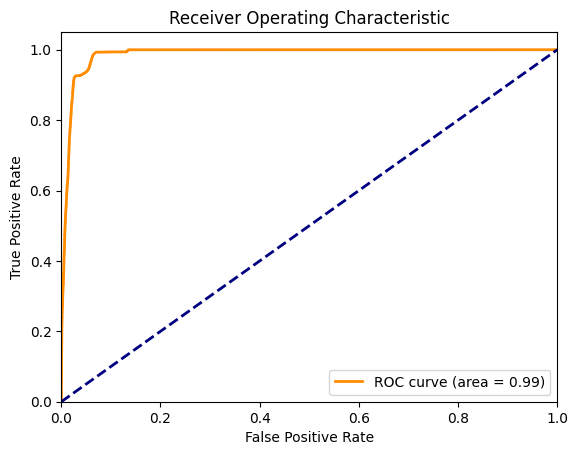

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.activations import gelu, swish, softplus
import joblib
import numpy as np

df = pd.read_parquet('teste11.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#scaler = StandardScaler()
scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define regularization parameters
l1_reg = 1e-4
l2_kernel_reg = 1e-2
l2_bias_reg = 1e-4
activity_reg = 1e-5

dpout = 0.5  # Increased dropout

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, activation=swish))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, activation=swish))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, activation=swish))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, activation=swish))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, activation=swish))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste30.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste00.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste10.parquet', engine='pyarrow')

X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

# Evaluate model on additional datasets
loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (50000): {accuracy_extra:.4f}')
print(f'Test Accuracy (100000): {accuracy1_extra:.4f}')
print(f'Test Accuracy (200000): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

# Function to calculate and print false positives and false negatives
def print_false_positives_negatives(y_true, y_pred_prob):
    y_pred = (y_pred_prob > 0.5).astype("int32")
    y_pred = y_pred.flatten()
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    print(f'False Positives (label 0 but predicted as 1): {false_positives}')
    print(f'False Negatives (label 1 but predicted as 0): {false_negatives}')

# Predictions and false positives/negatives for the main test set
y_pred_prob = model.predict(X_test_scaled).ravel()
print_false_positives_negatives(y_test.values, y_pred_prob)

# Predictions and false positives/negatives for additional test sets
y_pred_prob_extra = model.predict(X_test_scaled_extra).ravel()
print_false_positives_negatives(y_test_extra.values, y_pred_prob_extra)

y_pred_prob1_extra = model.predict(X_test1_scaled_extra).ravel()
print_false_positives_negatives(y_test1_extra.values, y_pred_prob1_extra)

y_pred_prob2_extra = model.predict(X_test2_scaled_extra).ravel()
print_false_positives_negatives(y_test2_extra.values, y_pred_prob2_extra)

# Plot ROC curve for the main test set
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Epoch 1/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6978 - loss: 0.6131 - val_accuracy: 0.8997 - val_loss: 0.2623 - learning_rate: 0.0010
Epoch 2/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8993 - loss: 0.2982 - val_accuracy: 0.9210 - val_loss: 0.2172 - learning_rate: 0.0010
Epoch 3/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9139 - loss: 0.2647 - val_accuracy: 0.9114 - val_loss: 0.2376 - learning_rate: 0.0010
Epoch 4/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9178 - loss: 0.2544 - val_accuracy: 0.9283 - val_loss: 0.1983 - learning_rate: 0.0010
Epoch 5/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9197 - loss: 0.2467 - val_accuracy: 0.9387 - val_loss: 0.1614 - learning_rate: 0.0010
Epoch 6/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9203 - loss: 0.2433 - val_accuracy: 0.9351 - val_loss: 0.1719 - learning_rate: 0.0010
Epoch 7/100
2930/2930 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accura

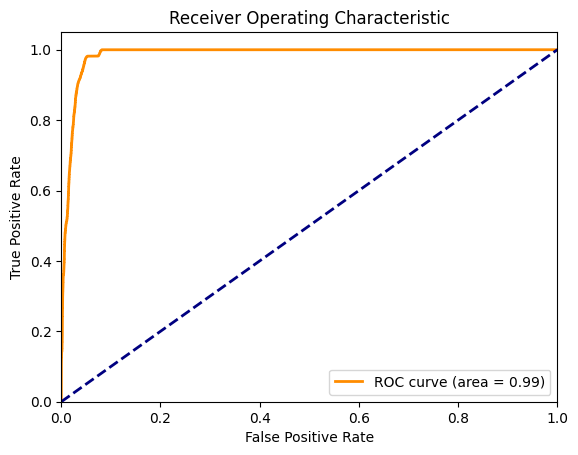


With Adjusted Threshold:
False Positives (label 0 but predicted as 1): 2694
False Negatives (label 1 but predicted as 0): 0
False Positives (label 0 but predicted as 1): 2819
False Negatives (label 1 but predicted as 0): 2852
False Positives (label 0 but predicted as 1): 5008
False Negatives (label 1 but predicted as 0): 667
False Positives (label 0 but predicted as 1): 7990
False Negatives (label 1 but predicted as 0): 8642


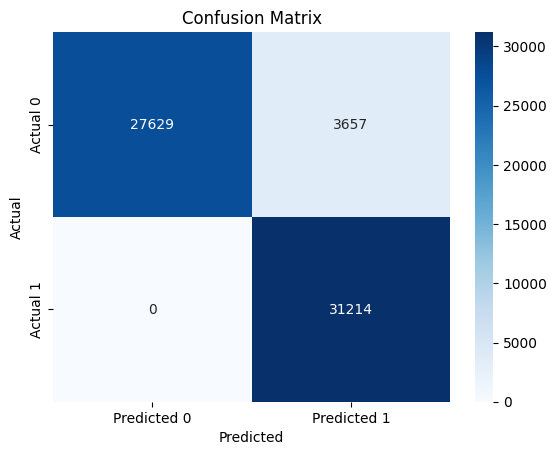

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
import joblib
import numpy as np
import seaborn as sns

df = pd.read_parquet('teste20.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define regularization parameters
dpout = 0.7  # Increased dropout

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste30.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste00.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste10.parquet', engine='pyarrow')

X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

# Evaluate model on additional datasets
loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (50000): {accuracy_extra:.4f}')
print(f'Test Accuracy (100000): {accuracy1_extra:.4f}')
print(f'Test Accuracy (200000): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

# Function to calculate and print false positives and false negatives
def print_false_positives_negatives(y_true, y_pred_prob, threshold=0.5):
    y_pred = (y_pred_prob > threshold).astype("int32")
    y_pred = y_pred.flatten()
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    print(f'False Positives (label 0 but predicted as 1): {false_positives}')
    print(f'False Negatives (label 1 but predicted as 0): {false_negatives}')

# Predictions and false positives/negatives for the main test set
y_pred_prob = model.predict(X_test_scaled).ravel()
print_false_positives_negatives(y_test.values, y_pred_prob)

# Predictions and false positives/negatives for additional test sets
y_pred_prob_extra = model.predict(X_test_scaled_extra).ravel()
print_false_positives_negatives(y_test_extra.values, y_pred_prob_extra)

y_pred_prob1_extra = model.predict(X_test1_scaled_extra).ravel()
print_false_positives_negatives(y_test1_extra.values, y_pred_prob1_extra)

y_pred_prob2_extra = model.predict(X_test2_scaled_extra).ravel()
print_false_positives_negatives(y_test2_extra.values, y_pred_prob2_extra)

# Plot ROC curve for the main test set
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Adjust classification threshold and re-evaluate
optimal_threshold = 0.7  # example threshold; you should experiment with different values

print("\nWith Adjusted Threshold:")
print_false_positives_negatives(y_test.values, y_pred_prob, threshold=optimal_threshold)
print_false_positives_negatives(y_test_extra.values, y_pred_prob_extra, threshold=optimal_threshold)
print_false_positives_negatives(y_test1_extra.values, y_pred_prob1_extra, threshold=optimal_threshold)
print_false_positives_negatives(y_test2_extra.values, y_pred_prob2_extra, threshold=optimal_threshold)

# Confusion matrix for main test set
y_pred = (y_pred_prob > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Epoch 1/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.6910 - loss: 0.8541 - val_accuracy: 0.6644 - val_loss: 0.7675 - learning_rate: 0.0010
Epoch 2/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9114 - loss: 0.3003 - val_accuracy: 0.8984 - val_loss: 0.2662 - learning_rate: 0.0010
Epoch 3/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9246 - loss: 0.2343 - val_accuracy: 0.9216 - val_loss: 0.2360 - learning_rate: 0.0010
Epoch 4/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9485 - loss: 0.1737 - val_accuracy: 0.9671 - val_loss: 0.1271 - learning_rate: 0.0010
Epoch 5/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9546 - loss: 0.1562 - val_accuracy: 0.9712 - val_loss: 0.1041 - learning_rate: 0.0010
Epoch 6/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9594 - loss: 0.1450 - val_accuracy: 0.9663 - val_loss: 0.1146 - learning_rate: 0.0010
Epoch 7/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9

667/667 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9753 - loss: 0.0885 - val_accuracy: 0.9821 - val_loss: 0.0596 - learning_rate: 1.0000e-04
Epoch 86/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9754 - loss: 0.0897 - val_accuracy: 0.9830 - val_loss: 0.0587 - learning_rate: 1.0000e-04
Epoch 87/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9762 - loss: 0.0872 - val_accuracy: 0.9823 - val_loss: 0.0589 - learning_rate: 1.0000e-04
Epoch 88/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9749 - loss: 0.0888 - val_accuracy: 0.9832 - val_loss: 0.0576 - learning_rate: 1.0000e-04
Epoch 89/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9759 - loss: 0.0876 - val_accuracy: 0.9822 - val_loss: 0.0594 - learning_rate: 1.0000e-04
Epoch 90/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9755 - loss: 0.0881 - val_accuracy: 0.9829 - val_loss: 0.0577 - learning_rate: 1.0000e-04
Epoch 91/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/st

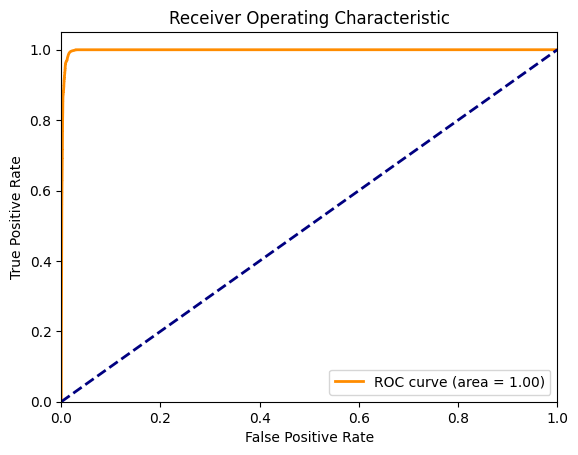

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.activations import gelu, swish, softplus
import joblib
import numpy as np

df = pd.read_parquet('teste123.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
scaler = StandardScaler()
#scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define regularization parameters
l1_reg = 1e-4
l2_kernel_reg = 1e-2
l2_bias_reg = 1e-4
activity_reg = 1e-5

l2_reg = 0.001
dpout = 0.5 # Increased dropout

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, activation=gelu))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, activation=gelu, kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, activation=gelu, kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, activation=gelu, kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, activation=gelu, kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=360, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste30.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste00.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste10.parquet', engine='pyarrow')

X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

# Evaluate model on additional datasets
loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (50000): {accuracy_extra:.4f}')
print(f'Test Accuracy (100000): {accuracy1_extra:.4f}')
print(f'Test Accuracy (200000): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

# Function to calculate and print false positives and false negatives
def print_false_positives_negatives(y_true, y_pred_prob):
    y_pred = (y_pred_prob > 0.5).astype("int32")
    y_pred = y_pred.flatten()
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    print(f'False Positives (label 0 but predicted as 1): {false_positives}')
    print(f'False Negatives (label 1 but predicted as 0): {false_negatives}')

# Predictions and false positives/negatives for the main test set
y_pred_prob = model.predict(X_test_scaled).ravel()
print_false_positives_negatives(y_test.values, y_pred_prob)

# Predictions and false positives/negatives for additional test sets
y_pred_prob_extra = model.predict(X_test_scaled_extra).ravel()
print_false_positives_negatives(y_test_extra.values, y_pred_prob_extra)

y_pred_prob1_extra = model.predict(X_test1_scaled_extra).ravel()
print_false_positives_negatives(y_test1_extra.values, y_pred_prob1_extra)

y_pred_prob2_extra = model.predict(X_test2_scaled_extra).ravel()
print_false_positives_negatives(y_test2_extra.values, y_pred_prob2_extra)

# Plot ROC curve for the main test set
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5162 - loss: 0.8193 - val_accuracy: 0.5510 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5807 - loss: 0.6468 - val_accuracy: 0.4525 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7356 - loss: 0.5047 - val_accuracy: 0.7922 - val_loss: 0.4689 - learning_rate: 0.0010
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8266 - loss: 0.4010 - val_accuracy: 0.8931 - val_loss: 0.3345 - learning_rate: 0.0010
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8701 - loss: 0.3367 - val_accuracy: 0.9374 - val_loss: 0.2441 - learning_rate: 0.0010
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8881 - loss: 0.3026 - val_accuracy: 0.9317 - val_loss: 0.2230 - learning_rate: 0.0010
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9000 - l

Epoch 44/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9301 - loss: 0.1882 - val_accuracy: 0.9648 - val_loss: 0.1011 - learning_rate: 1.0000e-04
Epoch 45/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9319 - loss: 0.1861 - val_accuracy: 0.9647 - val_loss: 0.1005 - learning_rate: 1.0000e-04
Epoch 46/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9316 - loss: 0.1869 - val_accuracy: 0.9654 - val_loss: 0.1007 - learning_rate: 1.0000e-04
Epoch 47/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9330 - loss: 0.1827 - val_accuracy: 0.9642 - val_loss: 0.1018 - learning_rate: 1.0000e-04
Epoch 48/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9326 - loss: 0.1820 - val_accuracy: 0.9653 - val_loss: 0.1014 - learning_rate: 1.0000e-04
Epoch 49/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9325 - loss: 0.1846 - val_accuracy: 0.9654 - val_loss: 0.1000 - learning_rate: 1.0000e-04
Epoch 50/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 1

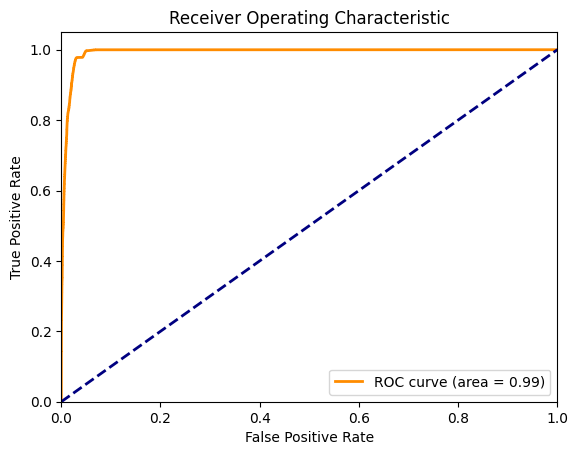


With Adjusted Threshold:
False Positives (label 0 but predicted as 1): 1731
False Negatives (label 1 but predicted as 0): 789
False Positives (label 0 but predicted as 1): 1735
False Negatives (label 1 but predicted as 0): 7984
False Positives (label 0 but predicted as 1): 2995
False Negatives (label 1 but predicted as 0): 2268
False Positives (label 0 but predicted as 1): 4730
False Negatives (label 1 but predicted as 0): 16112


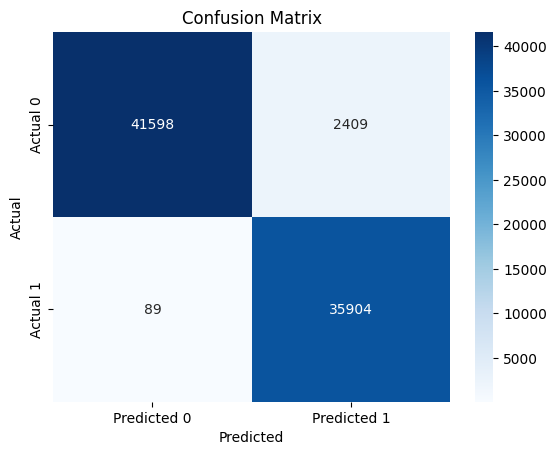

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.activations import gelu, swish, softplus
from tensorflow.keras.optimizers import RMSprop, Adam
import joblib
import numpy as np
import seaborn as sns

df = pd.read_parquet('teste123.parquet', engine='pyarrow')

X = df[['inst', 'bi', 'time']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

dpout = 0.8 

model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(64, activation=gelu))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(32, activation=gelu))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(16, activation=gelu))
model.add(BatchNormalization())
model.add(Dropout(dpout))
model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1024, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Load additional datasets
df_test = pd.read_parquet('teste30.parquet', engine='pyarrow')
df_test1 = pd.read_parquet('teste00.parquet', engine='pyarrow')
df_test2 = pd.read_parquet('teste10.parquet', engine='pyarrow')

X_test_extra = df_test[['inst', 'bi', 'time']]
X_test1_extra = df_test1[['inst', 'bi', 'time']]
X_test2_extra = df_test2[['inst', 'bi', 'time']]
y_test_extra = df_test['label']
y_test1_extra = df_test1['label']
y_test2_extra = df_test2['label']

X_test_scaled_extra = scaler.transform(X_test_extra)
X_test1_scaled_extra = scaler.transform(X_test1_extra)
X_test2_scaled_extra = scaler.transform(X_test2_extra)

# Evaluate model on additional datasets
loss_extra, accuracy_extra = model.evaluate(X_test_scaled_extra, y_test_extra)
loss1_extra, accuracy1_extra = model.evaluate(X_test1_scaled_extra, y_test1_extra)
loss2_extra, accuracy2_extra = model.evaluate(X_test2_scaled_extra, y_test2_extra)

print(f'Test Accuracy (50000): {accuracy_extra:.4f}')
print(f'Test Accuracy (100000): {accuracy1_extra:.4f}')
print(f'Test Accuracy (200000): {accuracy2_extra:.4f}')

model.save('nn_model.keras')
joblib.dump(scaler, 'scaler.joblib')

# Function to calculate and print false positives and false negatives
def print_false_positives_negatives(y_true, y_pred_prob, threshold=0.5):
    y_pred = (y_pred_prob > threshold).astype("int32")
    y_pred = y_pred.flatten()
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    print(f'False Positives (label 0 but predicted as 1): {false_positives}')
    print(f'False Negatives (label 1 but predicted as 0): {false_negatives}')

# Predictions and false positives/negatives for the main test set
y_pred_prob = model.predict(X_test_scaled).ravel()
print_false_positives_negatives(y_test.values, y_pred_prob)

# Predictions and false positives/negatives for additional test sets
y_pred_prob_extra = model.predict(X_test_scaled_extra).ravel()
print_false_positives_negatives(y_test_extra.values, y_pred_prob_extra)

y_pred_prob1_extra = model.predict(X_test1_scaled_extra).ravel()
print_false_positives_negatives(y_test1_extra.values, y_pred_prob1_extra)

y_pred_prob2_extra = model.predict(X_test2_scaled_extra).ravel()
print_false_positives_negatives(y_test2_extra.values, y_pred_prob2_extra)

# Plot ROC curve for the main test set
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Adjust classification threshold and re-evaluate
optimal_threshold = 0.7  # example threshold; you should experiment with different values

print("\nWith Adjusted Threshold:")
print_false_positives_negatives(y_test.values, y_pred_prob, threshold=optimal_threshold)
print_false_positives_negatives(y_test_extra.values, y_pred_prob_extra, threshold=optimal_threshold)
print_false_positives_negatives(y_test1_extra.values, y_pred_prob1_extra, threshold=optimal_threshold)
print_false_positives_negatives(y_test2_extra.values, y_pred_prob2_extra, threshold=optimal_threshold)

# Confusion matrix for main test set
y_pred = (y_pred_prob > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



20313/20313 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step
New Dataset Accuracy: 0.9099
Number of samples predicted as 0: 315037
Number of samples predicted as 1: 334963


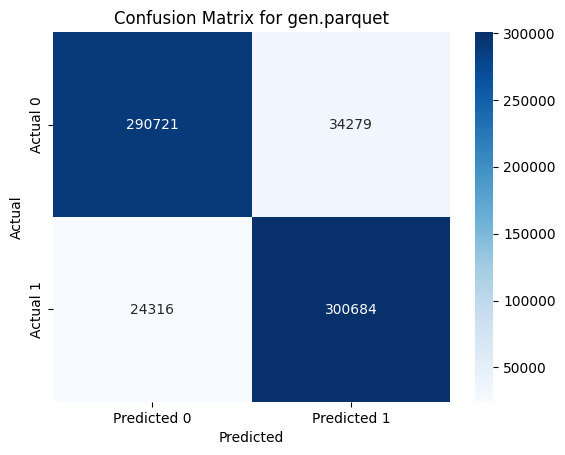

In [1]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def predict_and_separate(dataset_file, threshold=0.5):
    # Load the saved model and scaler
    model = load_model('nn_model.keras')
    scaler = joblib.load('scaler.joblib')

    # Load the dataset for prediction
    df_new = pd.read_parquet(dataset_file, engine='pyarrow')

    # Prepare the data
    X_new = df_new[['inst', 'bi', 'time']]
    y_new = df_new['label']  # If you have the actual labels for accuracy calculation

    # Scale the data
    X_new_scaled = scaler.transform(X_new)

    # Predict the probabilities
    y_pred_prob_new = model.predict(X_new_scaled).ravel()

    # Convert probabilities to binary predictions
    y_pred_new = (y_pred_prob_new > threshold).astype("int32")

    # Calculate accuracy if you have the true labels
    accuracy_new = accuracy_score(y_new, y_pred_new)
    print(f'New Dataset Accuracy: {accuracy_new:.4f}')

    # Separate the data into two datasets based on the predictions
    df_pred_0 = df_new[y_pred_new == 0]
    df_pred_1 = df_new[y_pred_new == 1]

    # Save the separated datasets to files
    df_pred_0.to_parquet(f'predicted_0_{dataset_file}', engine='pyarrow')
    df_pred_1.to_parquet(f'predicted_1_{dataset_file}', engine='pyarrow')

    # Print the number of samples in each dataset
    print(f'Number of samples predicted as 0: {len(df_pred_0)}')
    print(f'Number of samples predicted as 1: {len(df_pred_1)}')

    # Confusion matrix for the new dataset
    cm_new = confusion_matrix(y_new, y_pred_new)
    sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {dataset_file}')
    plt.show()

# Example usage
predict_and_separate('gen.parquet')


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler, MinMaxScaler
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Ensure pyarrow is imported explicitly
import pyarrow

# Load the Parquet file
df = pd.read_parquet('gen_with_power.parquet', engine='pyarrow')

# Define the input and output features
X = df[['inst', 'bi', 'cores', 'gpus', 'memory']].values
y = df[['time', 'power']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##scaler = StandardScaler()
##scaler = Normalizer()
scaler_X = MaxAbsScaler()
#scaler = RobustScaler()
##scaler = MaxAbsScaler()
##scaler = MinMaxScaler()
scaler_y = MaxAbsScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.7))  # Dropout layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))  # Dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))  # Dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.7))  # Dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))  # Dropout layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.7))  # Dropout layer
model.add(Dense(2))

# Compile the model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=64, batch_size=128, validation_split=0.2,callbacks=[early_stopping, reduce_lr])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions to get them back to the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred)

# Create a DataFrame to display actual vs. predicted values
results_df = pd.DataFrame({
    'Actual Time': scaler_y.inverse_transform(y_test)[:, 0],
    'Predicted Time': y_pred_original_scale[:, 0],
    'Actual Power': scaler_y.inverse_transform(y_test)[:, 1],
    'Predicted Power': y_pred_original_scale[:, 1]
})

# Print the DataFrame
print(results_df)


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0085 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 2/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0060 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 3/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0060 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 4/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0059 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 5/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0059 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 6/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0060 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 7/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0061 - val_loss: 0.0060 - learning_rate: 2.0000e-04
Epoch 8/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0060 - val_loss: 0.0060 - learning_rate: 2.0000e-04
Epoch 9/64
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0059 - val_loss

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure pyarrow is imported explicitly
import pyarrow

# Load the Parquet file
df = pd.read_parquet('gen_with_power.parquet', engine='pyarrow')

# Define the input and output features
X = df[['inst', 'bi', 'cores', 'gpus', 'memory']].values
y = df[['time', 'power']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use StandardScaler for scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Define the model
model_time = RandomForestRegressor(n_estimators=100, random_state=42)
model_power = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_time.fit(X_train, y_train[:, 0])
model_power.fit(X_train, y_train[:, 1])

# Make predictions
y_pred_time = model_time.predict(X_test)
y_pred_power = model_power.predict(X_test)

# Combine the predictions
y_pred = np.column_stack((y_pred_time, y_pred_power))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse}')

# Inverse transform the predictions to get them back to the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred)
y_test_original_scale = scaler_y.inverse_transform(y_test)

# Create a DataFrame to display actual vs. predicted values
results_df = pd.DataFrame({
    'Actual Time': y_test_original_scale[:, 0],
    'Predicted Time': y_pred_original_scale[:, 0],
    'Actual Power': y_test_original_scale[:, 1],
    'Predicted Power': y_pred_original_scale[:, 1]
})

# Print the DataFrame
print(results_df)


Mean Squared Error on test set: 1.1079625305776937
       Actual Time  Predicted Time  Actual Power  Predicted Power
0       480.378529      335.014083    549.213633      2502.646345
1       233.660765      403.845058    985.801851      2088.854066
2       234.316844      737.311124   1416.064742      2233.210387
3       118.264214      290.867950    601.746474      3674.063933
4       236.424696      568.018623    718.187214      1667.012253
...            ...             ...           ...              ...
66988   117.844082      621.452555    550.826197      2453.782613
66989   118.348588      441.003542    889.983455      1999.434991
66990    83.351508      537.255116    620.404078      2357.820086
66991   237.660026      330.238430    587.213081      2125.897414
66992   236.237207      570.660079    569.746400      1932.324819

[66993 rows x 4 columns]


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, RobustScaler, MaxAbsScaler, MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.activations import gelu, swish, softplus
from tensorflow.keras.models import Model

# Ensure pyarrow is imported explicitly
import pyarrow

# Load the Parquet file
df = pd.read_parquet('gen_with_power.parquet', engine='pyarrow')

# Define the input and output features
X = df[['inst', 'bi', 'cores', 'gpus', 'memory']].values
y = df[['time', 'power']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

n = 0.7
input_layer = Input(shape=(X_train.shape[1],))

hidden = Dense(512, activation=softplus)(input_layer)
hidden = Dropout(n)(hidden)
hidden = Dense(256, activation=softplus)(hidden)
hidden = Dropout(n)(hidden)
hidden = Dense(128, activation=softplus)(hidden)
hidden = Dropout(n)(hidden)
hidden = Dense(64, activation=softplus)(hidden)
hidden = Dropout(n)(hidden)
hidden = Dense(32, activation=softplus)(hidden)
hidden = Dropout(n)(hidden)
hidden = Dense(16, activation=softplus)(hidden)
hidden = Dropout(n)(hidden)
output_layer = Dense(2)(hidden)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Start with a common learning rate
model.compile(optimizer=optimizer, loss='mse')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=64, batch_size=100, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions to get them back to the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred)
y_test_original_scale = scaler_y.inverse_transform(y_test)

# Create a DataFrame to display actual vs. predicted values
results_df = pd.DataFrame({
    'Actual Time': y_test_original_scale[:, 0],
    'Predicted Time': y_pred_original_scale[:, 0],
    'Actual Power': y_test_original_scale[:, 1],
    'Predicted Power': y_pred_original_scale[:, 1]
})

results_df.to_parquet('results.parquet', engine='pyarrow')

print(results_df)

Epoch 1/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 7.6929 - val_loss: 1.0347 - learning_rate: 0.0010
Epoch 2/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 1.0493 - val_loss: 1.0235 - learning_rate: 0.0010
Epoch 3/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.9994 - val_loss: 1.0231 - learning_rate: 0.0010
Epoch 4/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 1.0052 - val_loss: 1.0232 - learning_rate: 0.0010
Epoch 5/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 1.0000 - val_loss: 1.0232 - learning_rate: 0.0010
Epoch 6/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 1.0075 - val_loss: 1.0232 - learning_rate: 0.0010
Epoch 7/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 1.0261 - val_loss: 1.0231 - learning_rate: 0.0010
Epoch 8/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.9748 - val_loss: 1.0232 - learning_rate: 0.0010
Epoch 9/64
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.9945 - val_loss: 1.0231 - lea

Means of each variable:
Actual Time         431.626692
Predicted Time      432.887726
Actual Power       2480.070281
Predicted Power    2467.101562
dtype: float64


C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\Nuno\AppData\Local\Temp\ipykernel_9312\4062925352.py:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')  # Set y-axis to log scale


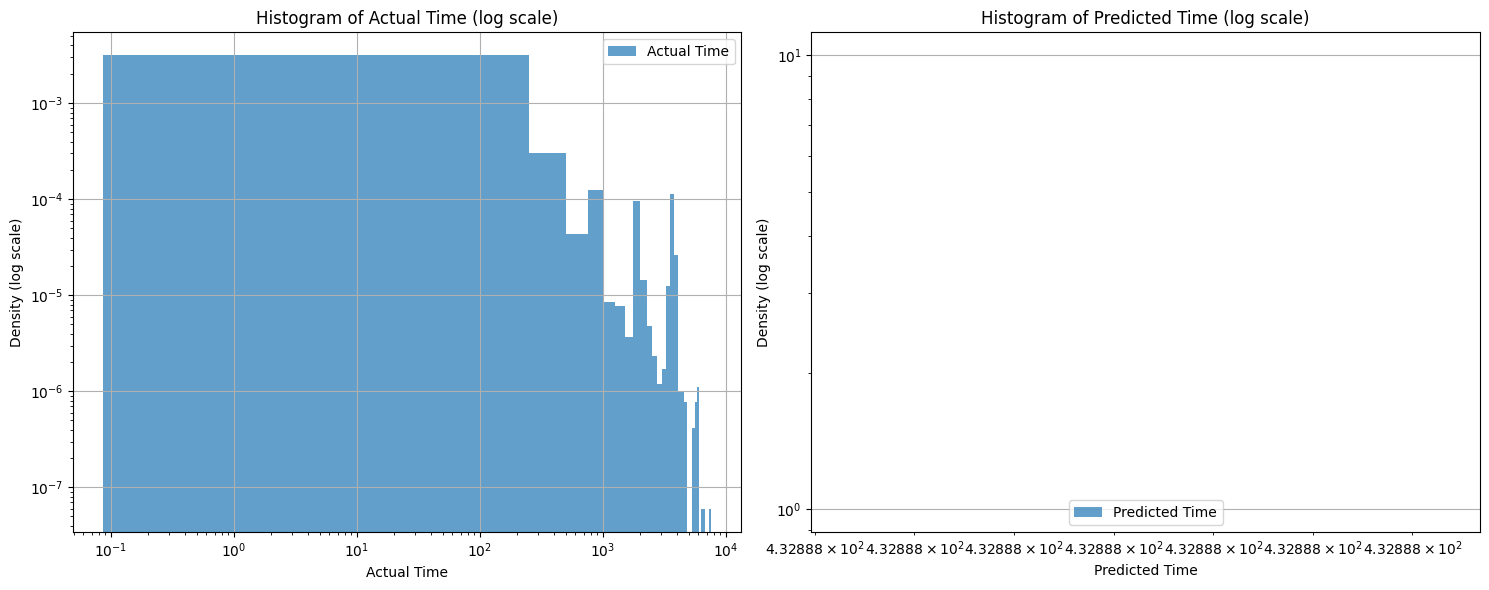

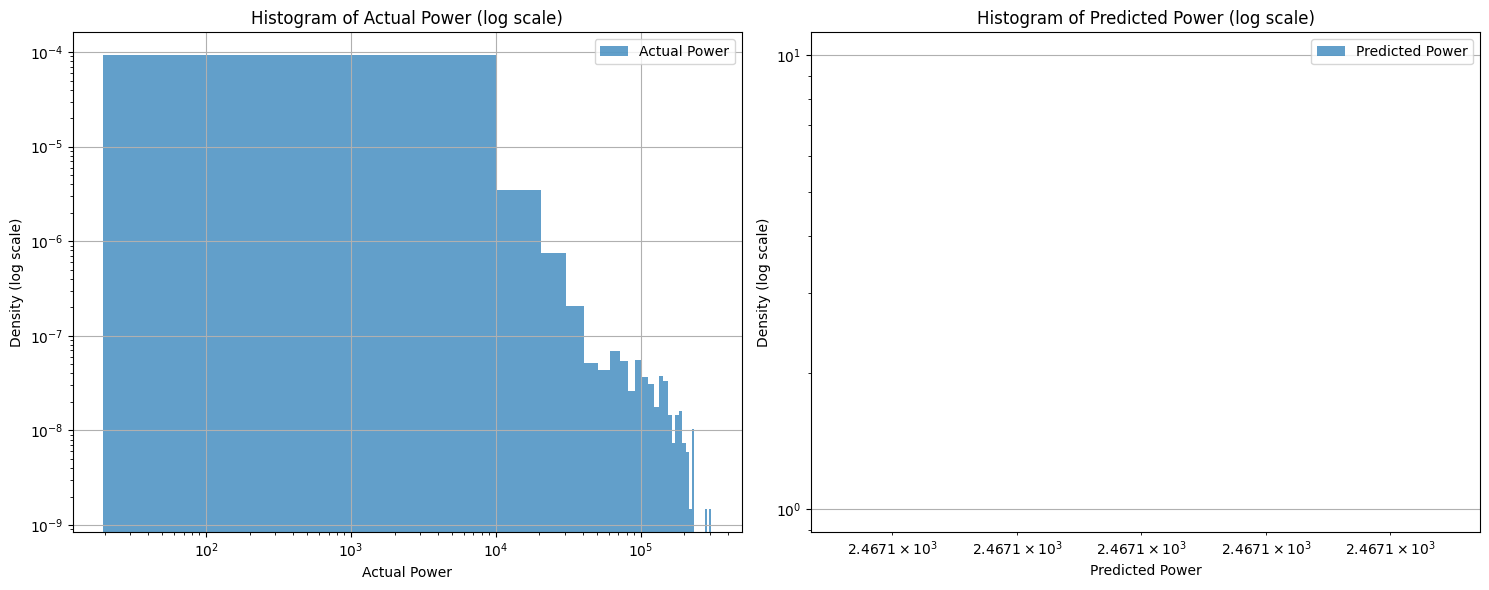

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Parquet file
results_df = pd.read_parquet('results.parquet', engine='pyarrow')

# Calculate the mean of each variable
means = results_df.mean()
print("Means of each variable:")
print(means)

# Variables to plot
variables = [('Actual Time', 'Predicted Time'), ('Actual Power', 'Predicted Power')]

# Plot histograms for each pair of variables side by side with consistent x-axis ranges
for var_pair in variables:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for ax, var in zip(axes, var_pair):
        # Filter out non-positive values
        filtered_data = results_df[var][results_df[var] > 0]
        
        # Check if there are any positive values left
        if filtered_data.empty:
            print(f"No positive values for {var}, skipping log-scale plot.")
            continue
        
        ax.hist(filtered_data, bins=30, alpha=0.7, label=var, density=True)  # density=True to normalize
        ax.set_yscale('log')  # Set y-axis to log scale
        ax.set_xscale('log')  # Set x-axis to log scale
        ax.set_title(f'Histogram of {var} (log scale)')
        ax.set_xlabel(var)
        ax.set_ylabel('Density (log scale)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [12]:
import pandas as pd

# Read the Parquet file
results_df = pd.read_parquet('results.parquet', engine='pyarrow')

# Print each row
for index, row in results_df.iterrows():
    print(row)

Actual Time         480.378529
Predicted Time      432.887787
Actual Power        549.213633
Predicted Power    2467.101807
Name: 0, dtype: float64
Actual Time         233.660765
Predicted Time      432.887787
Actual Power        985.801851
Predicted Power    2467.101807
Name: 1, dtype: float64
Actual Time         234.316844
Predicted Time      432.887787
Actual Power       1416.064742
Predicted Power    2467.101807
Name: 2, dtype: float64
Actual Time         118.264214
Predicted Time      432.887787
Actual Power        601.746474
Predicted Power    2467.101807
Name: 3, dtype: float64
Actual Time         236.424696
Predicted Time      432.887787
Actual Power        718.187214
Predicted Power    2467.101807
Name: 4, dtype: float64
Actual Time         224.247668
Predicted Time      432.887787
Actual Power        954.741968
Predicted Power    2467.102051
Name: 5, dtype: float64
Actual Time         234.616355
Predicted Time      432.887787
Actual Power        632.252334
Predicted Power    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Actual Time          57.437811
Predicted Time      432.887787
Actual Power       1377.477468
Predicted Power    2467.101807
Name: 63763, dtype: float64
Actual Time         236.857946
Predicted Time      432.887787
Actual Power        831.014502
Predicted Power    2467.101807
Name: 63764, dtype: float64
Actual Time         117.827930
Predicted Time      432.887787
Actual Power        900.196495
Predicted Power    2467.101807
Name: 63765, dtype: float64
Actual Time         235.898055
Predicted Time      432.887787
Actual Power       9038.496282
Predicted Power    2467.101807
Name: 63766, dtype: float64
Actual Time         236.654433
Predicted Time      432.887787
Actual Power        810.429843
Predicted Power    2467.101807
Name: 63767, dtype: float64
Actual Time         237.118126
Predicted Time      432.887787
Actual Power        569.879232
Predicted Power    2467.101807
Name: 63768, dtype: float64
Actual Time          59.144778
Predicted Time      432.887787
Actual Power       1110.84

Actual Time         233.670761
Predicted Time      432.887787
Actual Power       2603.825728
Predicted Power    2467.101807
Name: 64426, dtype: float64
Actual Time           59.474174
Predicted Time       432.887787
Actual Power       56557.985366
Predicted Power     2467.101807
Name: 64427, dtype: float64
Actual Time         117.474419
Predicted Time      432.887787
Actual Power        540.629704
Predicted Power    2467.102051
Name: 64428, dtype: float64
Actual Time          59.514376
Predicted Time      432.887787
Actual Power       2216.397416
Predicted Power    2467.102051
Name: 64429, dtype: float64
Actual Time         224.531251
Predicted Time      432.887787
Actual Power        559.735707
Predicted Power    2467.101807
Name: 64430, dtype: float64
Actual Time         473.945230
Predicted Time      432.887787
Actual Power        801.379839
Predicted Power    2467.101807
Name: 64431, dtype: float64
Actual Time         194.791759
Predicted Time      432.887787
Actual Power        84

Actual Time         479.664741
Predicted Time      432.887787
Actual Power       7697.442203
Predicted Power    2467.101807
Name: 64877, dtype: float64
Actual Time         236.979178
Predicted Time      432.887787
Actual Power        512.977233
Predicted Power    2467.101807
Name: 64878, dtype: float64
Actual Time           6.281313
Predicted Time      432.887787
Actual Power        889.389572
Predicted Power    2467.101807
Name: 64879, dtype: float64
Actual Time          236.299729
Predicted Time       432.887787
Actual Power       11076.351263
Predicted Power     2467.101807
Name: 64880, dtype: float64
Actual Time          83.012025
Predicted Time      432.887787
Actual Power        990.104671
Predicted Power    2467.101807
Name: 64881, dtype: float64
Actual Time           7.959433
Predicted Time      432.887787
Actual Power        520.064396
Predicted Power    2467.101807
Name: 64882, dtype: float64
Actual Time          84.153091
Predicted Time      432.887787
Actual Power        63

Actual Time         237.216890
Predicted Time      432.887787
Actual Power        564.192371
Predicted Power    2467.101807
Name: 65471, dtype: float64
Actual Time          58.892979
Predicted Time      432.887787
Actual Power        804.999298
Predicted Power    2467.101807
Name: 65472, dtype: float64
Actual Time         236.553999
Predicted Time      432.887787
Actual Power        836.444907
Predicted Power    2467.102051
Name: 65473, dtype: float64
Actual Time        3800.095262
Predicted Time      432.887787
Actual Power       3170.298964
Predicted Power    2467.101807
Name: 65474, dtype: float64
Actual Time         237.387559
Predicted Time      432.887787
Actual Power        569.334474
Predicted Power    2467.101807
Name: 65475, dtype: float64
Actual Time        1839.097599
Predicted Time      432.887787
Actual Power        560.334420
Predicted Power    2467.101807
Name: 65476, dtype: float64
Actual Time         959.528558
Predicted Time      432.887787
Actual Power        649.86

Actual Time         237.457408
Predicted Time      432.887787
Actual Power        721.581071
Predicted Power    2467.101807
Name: 66009, dtype: float64
Actual Time         237.793207
Predicted Time      432.887787
Actual Power        520.105428
Predicted Power    2467.101807
Name: 66010, dtype: float64
Actual Time         950.197558
Predicted Time      432.887787
Actual Power        535.305994
Predicted Power    2467.101807
Name: 66011, dtype: float64
Actual Time         479.843246
Predicted Time      432.887787
Actual Power        531.370786
Predicted Power    2467.101807
Name: 66012, dtype: float64
Actual Time         236.933980
Predicted Time      432.887787
Actual Power        686.979719
Predicted Power    2467.102051
Name: 66013, dtype: float64
Actual Time         224.376484
Predicted Time      432.887787
Actual Power        829.421925
Predicted Power    2467.101807
Name: 66014, dtype: float64
Actual Time        3593.325574
Predicted Time      432.887787
Actual Power       1677.35

Actual Time         237.378802
Predicted Time      432.887787
Actual Power        530.978611
Predicted Power    2467.101807
Name: 66472, dtype: float64
Actual Time         474.905610
Predicted Time      432.887787
Actual Power        719.964414
Predicted Power    2467.101807
Name: 66473, dtype: float64
Actual Time         234.076575
Predicted Time      432.887787
Actual Power       3360.107539
Predicted Power    2467.101807
Name: 66474, dtype: float64
Actual Time         959.877439
Predicted Time      432.887787
Actual Power        744.400172
Predicted Power    2467.101807
Name: 66475, dtype: float64
Actual Time         117.411517
Predicted Time      432.887787
Actual Power       7238.613058
Predicted Power    2467.101807
Name: 66476, dtype: float64
Actual Time         237.818687
Predicted Time      432.887787
Actual Power        840.005687
Predicted Power    2467.101807
Name: 66477, dtype: float64
Actual Time         118.339367
Predicted Time      432.887787
Actual Power       2166.96

Actual Time          29.185513
Predicted Time      432.887787
Actual Power        560.542024
Predicted Power    2467.101807
Name: 66981, dtype: float64
Actual Time         194.537124
Predicted Time      432.887787
Actual Power        510.321954
Predicted Power    2467.101807
Name: 66982, dtype: float64
Actual Time         449.164829
Predicted Time      432.887787
Actual Power        824.779708
Predicted Power    2467.102051
Name: 66983, dtype: float64
Actual Time         118.365699
Predicted Time      432.887787
Actual Power        679.078146
Predicted Power    2467.101807
Name: 66984, dtype: float64
Actual Time         118.334548
Predicted Time      432.887787
Actual Power       1467.665034
Predicted Power    2467.101807
Name: 66985, dtype: float64
Actual Time         237.487239
Predicted Time      432.887787
Actual Power        540.604336
Predicted Power    2467.101807
Name: 66986, dtype: float64
Actual Time         235.840261
Predicted Time      432.887787
Actual Power        509.80

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

df = pd.read_parquet('gen_with_power.parquet', engine='pyarrow')
X = df[['inst', 'bi', 'cores', 'gpus', 'memory']].values
y = df[['time', 'power']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Reshape X to 3D for CNN (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1]))  # Output layer for multi-output regression

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=32, batch_size=10, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred)
y_test_original_scale = scaler_y.inverse_transform(y_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Time': y_test_original_scale[:, 0],
    'Predicted Time': y_pred_original_scale[:, 0],
    'Actual Power': y_test_original_scale[:, 1],
    'Predicted Power': y_pred_original_scale[:, 1]
})



print(results_df)



C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 1.0057 - val_loss: 1.0213
Epoch 2/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 1.0050 - val_loss: 1.0223
Epoch 3/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 0.9663 - val_loss: 1.0210
Epoch 4/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - loss: 1.0188 - val_loss: 1.0212
Epoch 5/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - loss: 0.9874 - val_loss: 1.0210
Epoch 6/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 0.9683 - val_loss: 1.0220
Epoch 7/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.9566 - val_loss: 1.0212
Epoch 8/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 1.0083 - val_loss: 1.0211
Epoch 9/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.0240 - val_loss: 1.0211
Epoch 10/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 1.0026 - val_loss: 1.0208
Epoch 11/32
21438/21438 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 0.9869 - val_loss: 1.02

In [1]:
print (results_df)

NameError: name 'results_df' is not defined

In [2]:
import pandas as pd
df = pd.read_parquet('gen_with_power.parquet', engine='pyarrow')
print (df)

          inst     bi         time  cores  gpus  memory        power
0       243103  78906    28.839636     16     4     1.0   780.246772
1       228880  74072   223.627759    128     4  3670.0  2160.443361
2       276092  89815    29.479093      4     3   424.0  1056.114529
3       238806  77543   237.161456     16     4   438.0  1092.253313
4       264545  74356   118.819548    128     0  1243.0  9252.446086
...        ...    ...          ...    ...   ...     ...          ...
334958  235960  78842  2021.538299     64    64    48.0   964.370157
334959  278162  77926    29.263680    128     4   367.0  1331.571942
334960  281879  91283   236.635441     64     0   453.0  1090.833429
334961  231259  76857   117.031384     24     3  3266.0   918.492698
334962  229382  74911   117.941015     24     4   406.0   836.358840

[334963 rows x 7 columns]


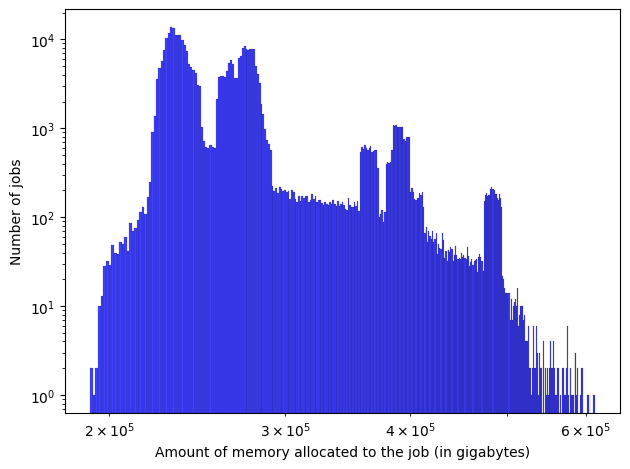

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.histplot(data=df, x="inst", kde=False, log_scale = False, color='blue')
plt.xlabel("Amount of memory allocated to the job (in gigabytes)")
plt.ylabel("Number of jobs")
plt.yscale("log")
plt.xscale("log")
plt.tight_layout()

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pyarrow

# Load the Parquet file
df = pd.read_parquet('gen_with_power.parquet', engine='pyarrow')

# Define the input and output features
X = df[['inst', 'bi', 'cores', 'gpus', 'memory']].values
y = df[['time', 'power']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse}')

# Inverse transform the predictions to get them back to the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred)
y_test_original_scale = scaler_y.inverse_transform(y_test)

# Create a DataFrame to display actual vs. predicted values
results_df = pd.DataFrame({
    'Actual Time': y_test_original_scale[:, 0],
    'Predicted Time': y_pred_original_scale[:, 0],
    'Actual Power': y_test_original_scale[:, 1],
    'Predicted Power': y_pred_original_scale[:, 1]
})

results_df.to_parquet('results_rf.parquet', engine='pyarrow')

print(results_df)


Mean Squared Error on test set: 1.0036259902944258
       Actual Time  Predicted Time   Actual Power  Predicted Power
0       480.378529      225.370312    1165.308690      2227.594868
1       233.660765      314.572575     530.438734     10696.517274
2       234.316844      630.438916     555.794185      4198.759922
3       118.264214      268.907716     520.720226      1768.094478
4       236.424696      727.817277     803.868182      4779.798990
...            ...             ...            ...              ...
66988   117.844082      594.756805  148117.821387      1735.271355
66989   118.348588      298.044861     518.050367      3079.773624
66990    83.351508      594.733427     559.374102      1354.207008
66991   237.660026      390.966128     850.302617      2161.717839
66992   236.237207      757.182405     559.724011      1925.730136

[66993 rows x 4 columns]


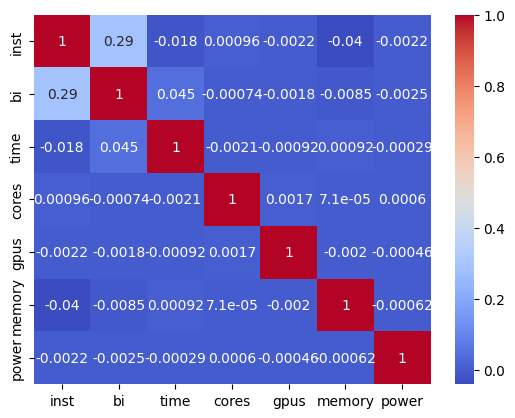

C:\Users\Nuno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


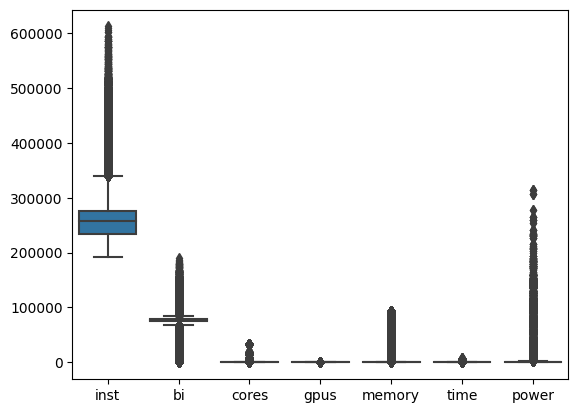

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Parquet file
df = pd.read_parquet('gen_with_power.parquet', engine='pyarrow')


corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


sns.boxplot(data=df[['inst', 'bi', 'cores', 'gpus', 'memory', 'time', 'power']])
plt.show()
